In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = "Indian_Railway_Train_Delay_Data - Sheet1.csv"
df = pd.read_csv(file_path)

df.head()

,Date,Train_no,Train_name,Station,Scheduled_arrival,Actual_arrival,Delay_minutes_clean,Status,Month,Day_of_weeks,Train_metadata
0,27/10/2025,12951,Mumbai–New Delhi Tejas Rajdhani,New delhi,08:32,09:03,31,Late,October,Monday,NaN
1,28/10/2025,12951,Mumbai–New Delhi Tejas Rajdhani,New delhi,08:32,08:26,-,Before,October,Tuesday,NaN
2,29/10/2025,12951,Mumbai–New Delhi Tejas Rajdhani,New delhi,08:32,08:25,-,Before,October,Wednesday,NaN
3,30/10/2025,12951,Mumbai–New Delhi Tejas Rajdhani,New delhi,08:32,08:30,-,Before,October,Thursday,NaN
4,31/10/2025,12951,Mumbai–New Delhi Tejas Rajdhani,New delhi,08:32,08:29,-,Before,October,Friday,NaN


In [6]:
print("row,column:", df.shape)
print(df.columns.tolist())


row,column: (61, 11)
['Date ', 'Train_no', 'Train_name', 'Station', 'Scheduled_arrival', 'Actual_arrival', 'Delay_minutes_clean', 'Status', 'Month', 'Day_of_weeks', 'Train_metadata']


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 61 non-null     object 
 1   Train_no             61 non-null     int64  
 2   Train_name           61 non-null     object 
 3   Station              61 non-null     object 
 4   Scheduled_arrival    61 non-null     object 
 5   Actual_arrival       61 non-null     object 
 6   Delay_minutes_clean  61 non-null     object 
 7   Status               61 non-null     object 
 8   Month                61 non-null     object 
 9   Day_of_weeks         61 non-null     object 
 10  Train_metadata       0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 5.4+ KB
None


In [8]:
# Keep only rows where delay is available
df = df[df["Delay_minutes_clean"].notna()]

# Ensure delay is numeric
df["Delay_minutes_clean"] = pd.to_numeric(df["Delay_minutes_clean"], errors="coerce")

# Final missing check
df.isna().sum()


Date                    0
Train_no                0
Train_name              0
Station                 0
Scheduled_arrival       0
Actual_arrival          0
Delay_minutes_clean    26
Status                  0
Month                   0
Day_of_weeks            0
Train_metadata         61
dtype: int64

In [10]:
avg_delay_by_day = (
    df.groupby("Day_of_weeks")["Delay_minutes_clean"]
      .mean()
      .round(2)
      .sort_values()
)

avg_delay_by_day


Day_of_weeks
Tuesday       7.40
Wednesday    37.25
Monday       42.17
Friday       47.60
Saturday     57.00
Sunday       75.40
Thursday     84.00
Name: Delay_minutes_clean, dtype: float64

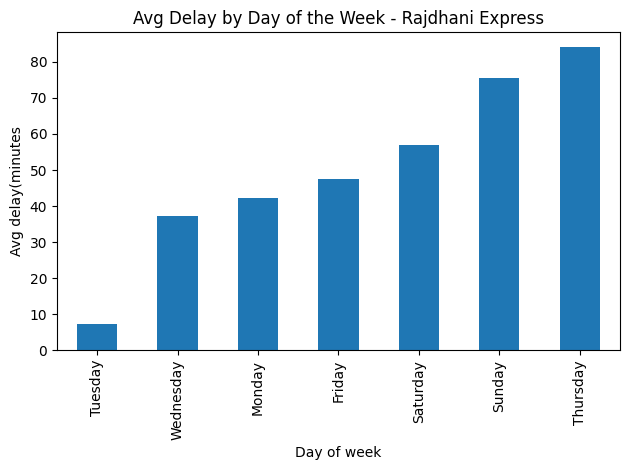

In [19]:
plt.figure()
avg_delay_by_day.plot(kind="bar")
plt.title("Avg Delay by Day of the Week - Rajdhani Express")
plt.xlabel("Day of week")
plt.ylabel("Avg delay(minutes")
plt.tight_layout()
plt.show()

In [25]:
status_counts = df["Status"].value_counts()
status_percentage = (status_counts / len(df) * 100).round(2)

status_summary = pd.DataFrame({
    "count": status_counts,
    "percentage": status_percentage
})

status_summary

,count,percentage
Status,,
Late,35,57.38
Before,23,37.70
On Time,3,4.92


In [26]:
avg_delay_by_month = (
    df.groupby("Month")["Delay_minutes_clean"]
        .mean()
        .round(2)
        .sort_values()

)

avg_delay_by_month

Month
Novermber     7.93
October      31.00
December     80.85
Name: Delay_minutes_clean, dtype: float64

In [28]:
print("Key Insights:")
print(f"- Highest average delays observed on: {avg_delay_by_day.idxmax()}")
print(f"- Lowest average delays observed on: {avg_delay_by_day.idxmin()}")
print(f"- Overall average delay: {df['Delay_minutes_clean'].mean().round(2)} minutes")
print(f"- Percentage of on-time trains: {status_summary.loc['On Time', 'percentage']}%")
 

Key Insights:
- Highest average delays observed on: Thursday
- Lowest average delays observed on: Tuesday
- Overall average delay: 50.26 minutes
- Percentage of on-time trains: 4.92%


In [29]:
df.to_csv("rajdhani_delay_final.csv", index=False)